<a href="https://colab.research.google.com/github/apskis/data_science_ai_colab_books/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Learning Objectives
- Understand the motivation for polynomial regression.
- Learn how polynomial regression extends linear regression.
- Implement polynomial regression in Python using scikit-learn.
- Compare model performance with linear regression.

---

## 1. What is Polynomial Regression?
- **Linear regression** models a straight-line relationship between predictors and target.
- **Polynomial regression** allows for curved relationships by adding polynomial terms of the features.

Equation (degree 2 example):

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon
$$

- Higher-degree polynomials can capture more complex patterns.
- Risk: **overfitting** if degree is too high.

---


In [ ]:
# 2. Generate a nonlinear dataset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Nonlinear relationship
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X.flatten()**3 - X.flatten()**2 + 2*X.flatten() + np.random.randn(100) * 3

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

## 3. Fit Linear Regression
We start with a simple linear regression model.


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

# r2 score
print('R2 Score (Test):', r2_score(y_test, y_pred_lr_test))
print('R2 Score (Train):', r2_score(y_train, y_pred_lr_train))

# rmse
print('RMSE (Test):', np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))
print('RMSE (Train):', np.sqrt(mean_squared_error(y_train, y_pred_lr_train)))

R2 Score (Test): 0.7854091720363017
R2 Score (Train): 0.8297531344957167
RMSE (Test): 4.146813044976041
RMSE (Train): 3.908388595581845


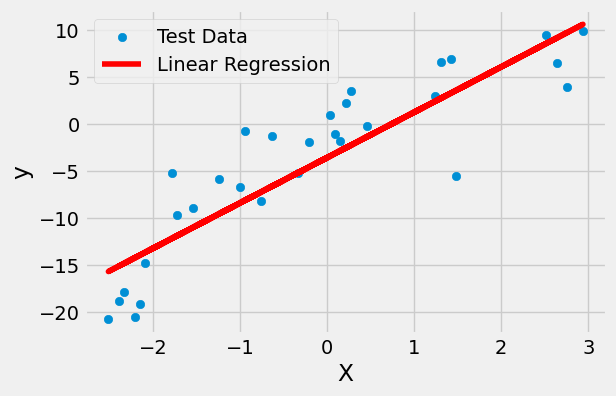

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test, y_test, label='Test Data')
    plt.plot(X_test, y_pred_lr_test, color='red', label='Linear Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

## 4. Fit Polynomial Regression
We add polynomial features (degree 2) to capture the nonlinear relationship.


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly_test = lr_poly.predict(X_test_poly)
y_pred_poly_train = lr_poly.predict(X_train_poly)

# r2 score
print('R2 Score (Test):', r2_score(y_test, y_pred_poly_test))
print('R2 Score (Train):', r2_score(y_train, y_pred_poly_train))

# rmse
print('RMSE (Test):', np.sqrt(mean_squared_error(y_test, y_pred_poly_test)))
print('RMSE (Train):', np.sqrt(mean_squared_error(y_train, y_pred_poly_train)))

R2 Score (Test): 0.8614288172976203
R2 Score (Train): 0.9059153448325667
RMSE (Test): 3.3323095686692827
RMSE (Train): 2.905477882544783


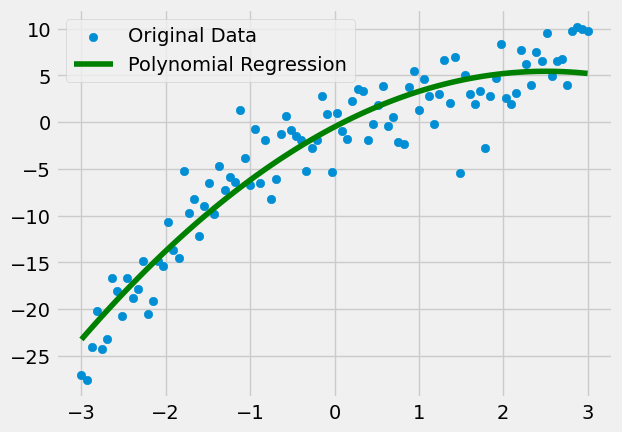

In [ ]:
with plt.style.context('fivethirtyeight'):
  x_vals = np.linspace(X.min(), X.max(), 100)
  x_vals_poly = poly.transform(x_vals.reshape(-1, 1))
  y_vals_poly = lr_poly.predict(x_vals_poly)
  plt.scatter(X, y, label='Original Data')
  plt.plot(x_vals, y_vals_poly, color='green', label='Polynomial Regression')
  plt.legend()


In [ ]:
# degree of 3

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly_test = lr_poly.predict(X_test_poly)
y_pred_poly_train = lr_poly.predict(X_train_poly)

# r2 score
print('R2 Score (Test):', r2_score(y_test, y_pred_poly_test))
print('R2 Score (Train):', r2_score(y_train, y_pred_poly_train))

# rmse
print('RMSE (Test):', np.sqrt(mean_squared_error(y_test, y_pred_poly_test)))
print('RMSE (Train):', np.sqrt(mean_squared_error(y_train, y_pred_poly_train)))

R2 Score (Test): 0.871889798465102
R2 Score (Train): 0.9368399523179184
RMSE (Test): 3.2040607035144935
RMSE (Train): 2.380561467226675


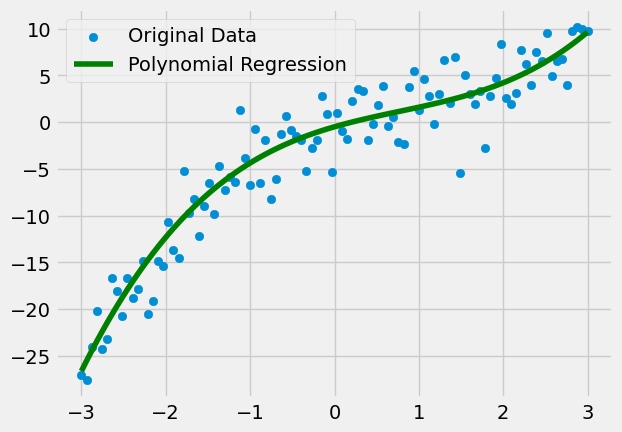

In [ ]:
with plt.style.context('fivethirtyeight'):
  x_vals = np.linspace(X.min(), X.max(), 100)
  x_vals_poly = poly.transform(x_vals.reshape(-1, 1))
  y_vals_poly = lr_poly.predict(x_vals_poly)
  plt.scatter(X, y, label='Original Data')
  plt.plot(x_vals, y_vals_poly, color='green', label='Polynomial Regression')
  plt.legend()

In [ ]:
# loop over polynomial features between 1 and 10

results = []

for degree in range(1, 55):
    if degree % 5 == 0:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        lr_poly = LinearRegression()
        lr_poly.fit(X_train_poly, y_train)

        y_pred_poly_test = lr_poly.predict(X_test_poly)
        y_pred_poly_train = lr_poly.predict(X_train_poly)

        # r2 score
        print(f'R2 Score for Degree: {degree}')
        print('R2 Score (Test):', r2_score(y_test, y_pred_poly_test))
        print('R2 Score (Train):', r2_score(y_train, y_pred_poly_train))
        print('========' * 20)
        print('\n')

R2 Score for Degree: 5
R2 Score (Test): 0.8730336735033655
R2 Score (Train): 0.9377317665370897


R2 Score for Degree: 10
R2 Score (Test): 0.8631412855160716
R2 Score (Train): 0.9411185921019358


R2 Score for Degree: 15
R2 Score (Test): 0.8545706546113992
R2 Score (Train): 0.9436926513859448


R2 Score for Degree: 20
R2 Score (Test): 0.8476049329381958
R2 Score (Train): 0.9439374075792967


R2 Score for Degree: 25
R2 Score (Test): 0.8510862647994716
R2 Score (Train): 0.9461313358771891


R2 Score for Degree: 30
R2 Score (Test): 0.7705782036453641
R2 Score (Train): 0.9353984319743074


R2 Score for Degree: 35
R2 Score (Test): 0.3639612404895738
R2 Score (Train): 0.8826261030339944


R2 Score for Degree: 40
R2 Score (Test): -9.888704245274985
R2 Score (Train): 0.8340364115016463


R2 Score for Degree: 45
R2 Score (Test): -13.180850178947084
R2 Score (Train): 0.7817623771779499


R2 Score for Degree: 50
R2 Score (Test): -192.0129022098477
R2 Score (Train): 0.7669269487905015




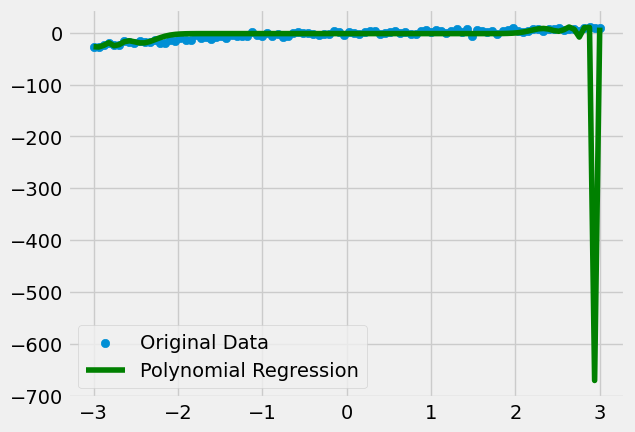

In [ ]:
with plt.style.context('fivethirtyeight'):
  x_vals = np.linspace(X.min(), X.max(), 100)
  x_vals_poly = poly.transform(x_vals.reshape(-1, 1))
  y_vals_poly = lr_poly.predict(x_vals_poly)
  plt.scatter(X, y, label='Original Data')
  plt.plot(x_vals, y_vals_poly, color='green', label='Polynomial Regression')
  plt.legend()

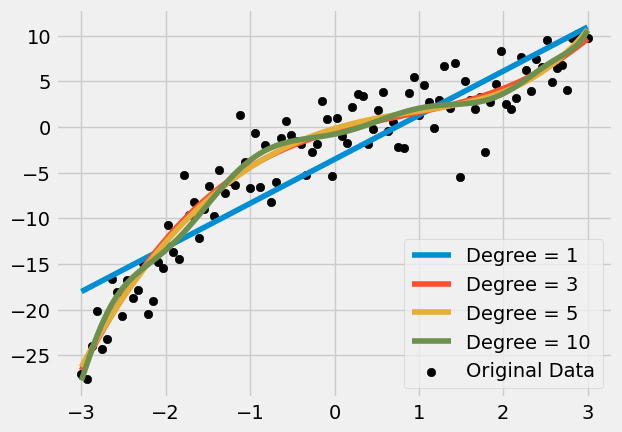

In [ ]:
# loop over polynomial features between 1 and 10
plt.style.use('fivethirtyeight')
results = []

for degree in range(1, 11):
      poly = PolynomialFeatures(degree=degree)
      X_train_poly = poly.fit_transform(X_train)
      X_test_poly = poly.transform(X_test)
      lr_poly = LinearRegression()
      lr_poly.fit(X_train_poly, y_train)

      y_pred_poly_test = lr_poly.predict(X_test_poly)
      y_pred_poly_train = lr_poly.predict(X_train_poly)

      # r2 score
      r2_score_test = r2_score(y_test, y_pred_poly_test)
      r2_score_train = r2_score(y_train, y_pred_poly_train)
      result_dictionary = {
          'degree': degree,
          'r2_score_train': r2_score_train,
          'r2_score_test': r2_score_test
      }
      results.append(result_dictionary)

      if degree in [1, 3, 5, 10]:
          x_vals = np.linspace(X.min(), X.max(), 100)
          x_vals_poly = poly.transform(x_vals.reshape(-1, 1))
          y_vals_poly = lr_poly.predict(x_vals_poly)
          plt.plot(x_vals, y_vals_poly, label=f'Degree = {degree}')

plt.scatter(X, y, label='Original Data', color='black')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

res = pd.DataFrame(results)
res.sort_values('r2_score_test', ascending=False)

,degree,r2_score_train,r2_score_test
3,4,0.937655,0.874044
4,5,0.937732,0.873034
2,3,0.936840,0.871890
8,9,0.940361,0.869607
7,8,0.940348,0.868336
5,6,0.938211,0.868329
6,7,0.939002,0.865339
9,10,0.941119,0.863141
1,2,0.905915,0.861429
0,1,0.829753,0.785409


## Pull all together

In [ ]:
df = pd.read_csv('/content/nyc-east-river-bicycle-counts.csv', index_col=0)
df.shape

(210, 10)

In [ ]:
df.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [ ]:
# what percent of day and date are equal to each other
 (df['Day'] == df['Date']).sum() / df.shape[0]

np.float64(1.0)

In [ ]:
df.drop(columns=['Date'], inplace=True)

In [ ]:
df.head()

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [ ]:
# look at null values
df.isnull().sum()

,0
Day,0
High Temp (°F),0
Low Temp (°F),0
Precipitation,0
Brooklyn Bridge,0
Manhattan Bridge,0
Williamsburg Bridge,0
Queensboro Bridge,0
Total,0


In [ ]:
df.describe()

,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,60.580000,46.413333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,11.183223,9.522796,981.237786,1704.731356,1814.039499,1099.254419,5569.173496
min,39.900000,26.100000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,55.000000,44.100000,1447.000000,2617.000000,3282.000000,2457.000000,9596.000000
50%,62.100000,46.900000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,68.000000,50.000000,3147.000000,5309.000000,6030.000000,4192.000000,18315.000000
max,81.000000,66.000000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


In [ ]:
df.head(1)

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497


In [ ]:
# checks if the bridge columns add up to the total
 (df[[x for x in df.columns if 'Bridge' in x]].sum(axis=1)
  == df['Total']).sum() / df.shape[0]

np.float64(1.0)

In [ ]:
# drop bridge columns
df.drop(columns=[x for x in df.columns if 'Bridge' in x],
        inplace=True)

In [ ]:
df.head()

,Day,High Temp (°F),Low Temp (°F),Precipitation,Total
0,2016-04-01 00:00:00,78.1,66.0,0.01,11497
1,2016-04-02 00:00:00,55.0,48.9,0.15,6922
2,2016-04-03 00:00:00,39.9,34.0,0.09,4759
3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),4335
4,2016-04-05 00:00:00,42.1,26.1,0,9471


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             210 non-null    object 
 1   High Temp (°F)  210 non-null    float64
 2   Low Temp (°F)   210 non-null    float64
 3   Precipitation   210 non-null    object 
 4   Total           210 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 17.9+ KB


In [ ]:
df['Precipitation'].value_counts()b

,count
Precipitation,
0,119
0.01,21
0.09,21
0.15,7
0.47 (S),7
0.2,7
T,7
0.16,7
0.24,7


In [ ]:
df[df['Precipitation'] == '0']['Total'].describe()

,Total
count,119.000000
mean,17710.058824
std,4231.122731
min,9126.000000
25%,16375.000000
50%,18180.000000
75%,20850.000000
max,23318.000000


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(30, 5)

In [ ]:
df['Precipitation_Clean'] = np.where(df['Precipitation'] == 'T', '0.001',
                                     np.where(df['Precipitation'] == '0.47 (S)',
                                              '0.47',
                                     df['Precipitation']))
df['Precipitation_Clean'].value_counts()

,count
Precipitation_Clean,
0,17
0.01,3
0.09,3
0.15,1
0.47,1
0.2,1
0.001,1
0.16,1
0.24,1


In [ ]:
# conver to being a float
df['Precipitation_Clean'] = df['Precipitation_Clean'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  30 non-null     object 
 1   High Temp (°F)       30 non-null     float64
 2   Low Temp (°F)        30 non-null     float64
 3   Precipitation        30 non-null     object 
 4   Total                30 non-null     int64  
 5   Precipitation_Clean  30 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.7+ KB


In [ ]:
df['Day'] = pd.to_datetime(df['Day'])

In [ ]:
df['day_of_week'] = df['Day'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [ ]:
df.head()

,Day,High Temp (°F),Low Temp (°F),Precipitation,Total,Precipitation_Clean,day_of_week,is_weekend
0,2016-04-01,78.1,66.0,0.01,11497,0.01,4,0
1,2016-04-02,55.0,48.9,0.15,6922,0.15,5,1
2,2016-04-03,39.9,34.0,0.09,4759,0.09,6,1
3,2016-04-04,44.1,33.1,0.47 (S),4335,0.47,0,0
4,2016-04-05,42.1,26.1,0,9471,0.00,1,0


In [ ]:
# make initial model
# use high/low temp, preceiptation, and weekend to predict
# total bikes
X = df[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation_Clean', 'is_weekend']]
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=46)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

r2_score_test = r2_score(y_test, y_pred_lr_test)
r2_score_train = r2_score(y_train, y_pred_lr_train)
print('R2 Score (Test):', r2_score_test)
print('R2 Score (Train):', r2_score_train)

R2 Score (Test): 0.7034247464543242
R2 Score (Train): 0.7414341136568239


<Axes: >

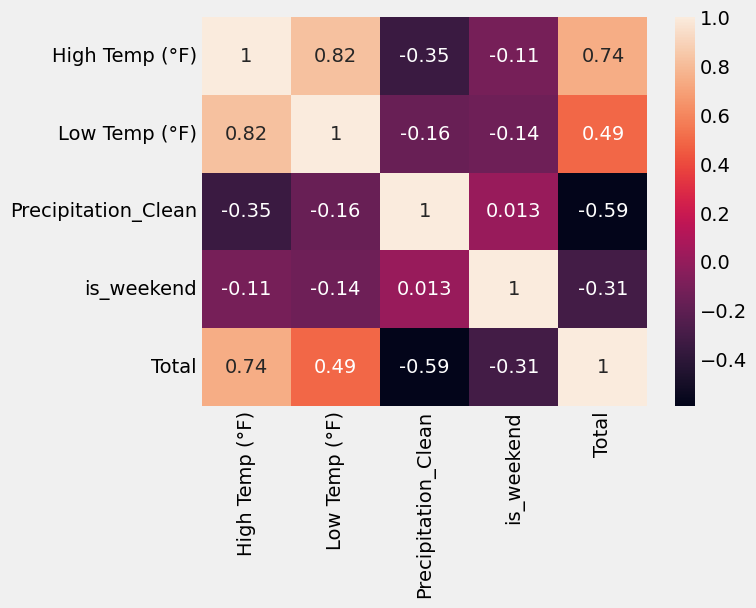

In [ ]:
sns.heatmap(df[['High Temp (°F)', 'Low Temp (°F)',
                'Precipitation_Clean', 'is_weekend', 'Total']].corr(),
            annot=True)

In [ ]:
# dummy code day of the week
df_dummy = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)
df_dummy.head()

,Day,High Temp (°F),Low Temp (°F),Precipitation,Total,Precipitation_Clean,is_weekend,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2016-04-01,78.1,66.0,0.01,11497,0.01,0,False,False,False,True,False,False
1,2016-04-02,55.0,48.9,0.15,6922,0.15,1,False,False,False,False,True,False
2,2016-04-03,39.9,34.0,0.09,4759,0.09,1,False,False,False,False,False,True
3,2016-04-04,44.1,33.1,0.47 (S),4335,0.47,0,False,False,False,False,False,False
4,2016-04-05,42.1,26.1,0,9471,0.00,0,True,False,False,False,False,False


In [ ]:
df_dummy.drop(columns=['Day', 'Precipitation'], inplace=True)

In [ ]:
X = df_dummy.drop(columns=['Total'])
y = df_dummy['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=46)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

r2_score_test = r2_score(y_test, y_pred_lr_test)
r2_score_train = r2_score(y_train, y_pred_lr_train)
print('R2 Score (Test):', r2_score_test)
print('R2 Score (Train):', r2_score_train)

R2 Score (Test): 0.1305756621232601
R2 Score (Train): 0.8309780191518308


In [ ]:
lr.coef_

array([   369.11431757,   -134.73885666, -40325.80408686,  -1027.72311323,
         4314.20188618,   2098.65381137,    824.20278357,  -2320.94690388,
          326.07690135,  -1353.80001458])

In [ ]:
X_train.head(2)

,High Temp (°F),Low Temp (°F),Precipitation_Clean,is_weekend,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
25,60.1,46.9,0.24,0,True,False,False,False,False,False
7,46.9,44.1,0.01,0,False,False,False,True,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
df['High Temp (°F)'].mean(), c

(np.float64(60.58), 11.347288906044534)

In [ ]:
(60.1 -  X_train['High Temp (°F)'].mean()) / X_train['High Temp (°F)'].std(ddof=0)

np.float64(-0.191571424935366)

In [ ]:
from sklearn.linear_model import Ridge, Lasso

lasso = Lasso(alpha=600)
lasso.fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['coef'])

,coef
High Temp (°F),2864.534035
Low Temp (°F),0.000000
Precipitation_Clean,-1768.878032
is_weekend,-652.938026
day_of_week_1,0.000000
day_of_week_2,278.706874
day_of_week_3,0.000000
day_of_week_4,-530.601517
day_of_week_5,-0.000000
day_of_week_6,-0.000000


In [ ]:
y_pred_lr_test = lasso.predict(X_test_scaled)
y_pred_lr_train = lasso.predict(X_train_scaled)

r2_score_test = r2_score(y_test, y_pred_lr_test)
r2_score_train = r2_score(y_train, y_pred_lr_train)
print('R2 Score (Test):', r2_score_test)
print('R2 Score (Train):', r2_score_train)

R2 Score (Test): 0.7439362557621644
R2 Score (Train): 0.7388369632868133


In [ ]:
coef_df = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['coef'])
coef_df[coef_df['coef'] != 0].index

Index(['High Temp (°F)', 'Precipitation_Clean', 'is_weekend', 'day_of_week_2',
       'day_of_week_4'],
      dtype='object')

In [ ]:
X = df_dummy[coef_df[coef_df['coef'] != 0].index.to_list()]
y = df_dummy['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=46)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

r2_score_test = r2_score(y_test, y_pred_lr_test)
r2_score_train = r2_score(y_train, y_pred_lr_train)
print('R2 Score (Test):', r2_score_test)
print('R2 Score (Train):', r2_score_train)

R2 Score (Test): 0.6058162484777456
R2 Score (Train): 0.7953780886427898


In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

ridge = Ridge(alpha=600)
ridge.fit(X_train_scaled, y_train)
pd.DataFrame(ridge.coef_, index=X_train.columns, columns=['coef'])

,coef
High Temp (°F),132.644741
Precipitation_Clean,-104.711611
is_weekend,-52.154423
day_of_week_2,38.724801
day_of_week_4,-19.630062


In [ ]:
y_pred_lr_test = ridge.predict(X_test_scaled)
y_pred_lr_train = ridge.predict(X_train_scaled)

r2_score_test = r2_score(y_test, y_pred_lr_test)
r2_score_train = r2_score(y_train, y_pred_lr_train)
print('R2 Score (Test):', r2_score_test)
print('R2 Score (Train):', r2_score_train)

R2 Score (Test): -0.09873184086666176
R2 Score (Train): 0.06459935408768114


In [ ]:
len(ridge.coef_) + 1

6